In [44]:
import coherenceSDP as cs
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

$M$ is the dephasing matrix for $n$ qubits $$M = \begin{bmatrix}1&1-p&1-p&(1-p)^2&\dots\\
1-p&1&(1-p)^2&\dots\\\dots\end{bmatrix}$$

coherence_SDP(n,p) computes the following SDP:
$$\begin{eqnarray} \tilde\gamma_2(M) &&= \min_{\eta,W,\Delta} \eta\\
&& s.t. \quad W_{ii} \leq \eta \quad \forall i\\
 && W\circ \begin{bmatrix}
  0 & \text{all ones}\\
  \text{all ones}& 0
\end{bmatrix} =\begin{bmatrix}
  0 &M-\text{diag}(M)+\Delta\\
  (M-\text{diag}(M)+\Delta)^T& 0\\
\end{bmatrix}\\
 && W \succeq 0
\end{eqnarray}
$$

In [45]:
#Generate coherence contraction data by solving SDP for various (n,p)
Nmax = 8
probability_range = np.arange(0,1,0.1)
Results = []

for n in tqdm(range(1,Nmax+1)):
    results_n = []
    for p in probability_range:
        results_n.append(cs.contraction_SDP(n,p))
    Results.append(results_n)

100%|██████████| 8/8 [23:46<00:00, 178.29s/it]


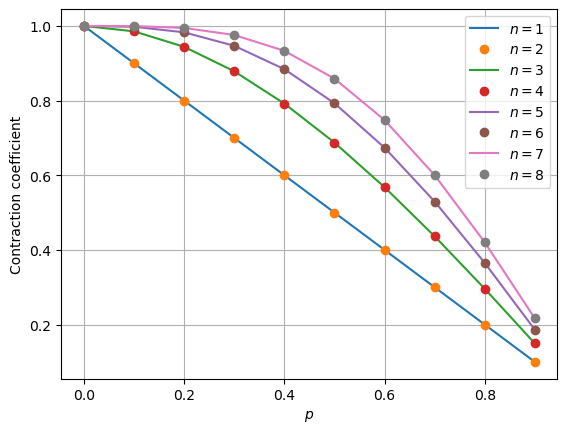

In [46]:
#Generate plots
fig,ax = plt.subplots()
for n in range(1,Nmax+1):
    if(n%2==0):
        ax.plot(probability_range,Results[n-1],'o',label = '$n=$'+str(n))
    else:
        ax.plot(probability_range,Results[n-1],label = '$n=$'+str(n))

    ax.grid('on')
ax.set_xlabel('$p$')
ax.set_ylabel('Contraction coefficient')
leg = ax.legend(loc='upper right')
leg._ncol = 1
#plt.show()
import tikzplotlib
tikzplotlib.save("mytikz.tex")